In [1]:
#Exercise 3
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

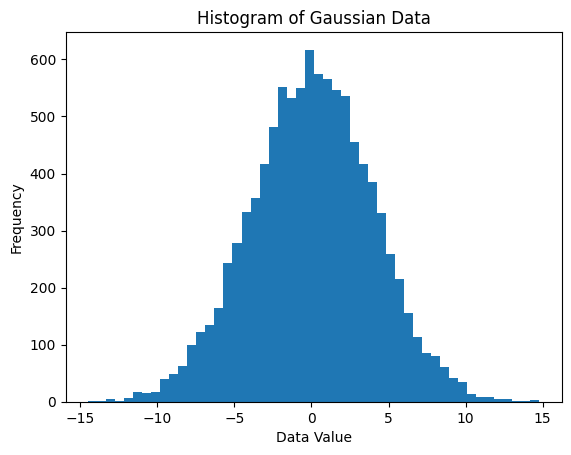

In [33]:
np.random.seed(10)
#Point 1 indtil 2
# Vi vælger mean & Standard deviation for vores normal fordeling
mu = 0
sigma = 4
# laver en random sample af 10.000 data points for normal fordeling
X = np.random.standard_normal(size=10000) * sigma + mu
# Laver histogram
plt.hist(X, bins=50)

plt.title("Histogram of Gaussian Data")
plt.xlabel("Data Value")
plt.ylabel("Frequency")

plt.show()

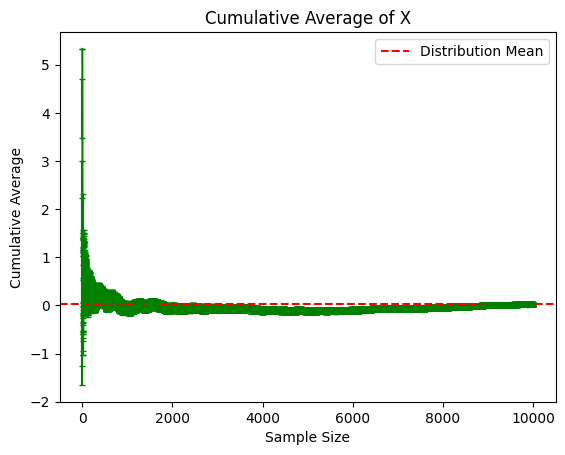

In [34]:
#Point 3 indtil 6
cumulative_avg = np.cumsum(X) / np.arange(1, len(X) + 1)
cumulative_error = np.cumsum((X - cumulative_avg) ** 2) / np.arange(1, len(X) + 1)
cumulative_standard_error = np.sqrt(cumulative_error) / np.sqrt(np.arange(1, len(X) + 1))

distribution_mean = np.mean(X)
distribution_median = np.median(X)

plt.errorbar(np.arange(1, len(X) + 1), cumulative_avg, yerr=cumulative_standard_error, fmt='-', capsize=2,color='green')
plt.axhline(y=distribution_mean, color='red', linestyle='--', label='Distribution Mean')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Average')
plt.title('Cumulative Average of X')
plt.legend()
plt.show()


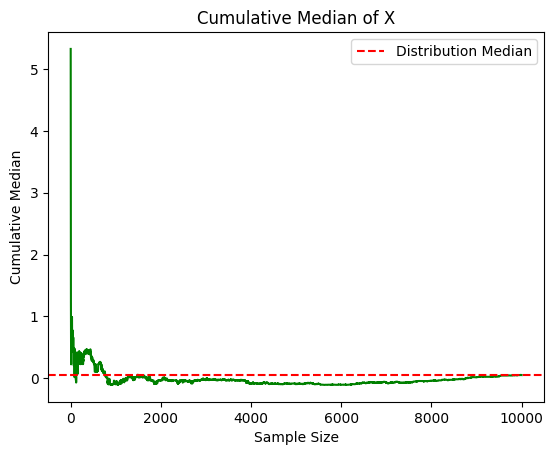

In [35]:
#Point 7 indtil 8
cumulative_median = np.zeros(len(X))
for i in range(len(X)):
    cumulative_median[i] = np.median(X[:i+1])

plt.plot(np.arange(1, len(X) + 1), cumulative_median, '-',color="green")
plt.axhline(y=distribution_median, color='r', linestyle='--', label='Distribution Median')
plt.xlabel('Sample Size')
plt.ylabel('Cumulative Median')
plt.title('Cumulative Median of X')
plt.legend()
plt.show()

C:\Users\Mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Mathi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


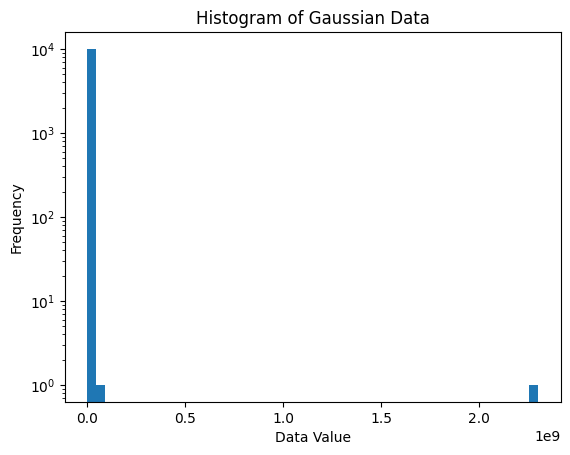

In [52]:
#Point 9 until 10
np.random.seed(5)
#Pareto distribution
xm = 1
alpha = 0.5

X = np.random.pareto(alpha, size=10000) + xm - 1
cumulative_avg = np.zeros(N)
cumulative_std_err = np.zeros(N)

for i in range(1, N+1):
    cumulative_avg[i-1] = np.mean(X[:i])
    cumulative_std_err[i-1] = np.std(X[:i], ddof=1) / np.sqrt(i)
# Laver histogram
plt.hist(X, bins=50)
plt.yscale('log')

plt.title("Histogram of Gaussian Data")
plt.xlabel("Data Value")
plt.ylabel("Frequency")

plt.show()
